# Segmetation on one labeled dataset

In this tutorial, we will segment cells on a manually labeled dataset with various methods and compare and with ground truth visually.

In [ ]:
import spateo as st
import matplotlib.pyplot as plt
from skimage.feature import canny
from scipy import ndimage as ndi
import numpy as np
import cv2

In [2]:
def sc_package(h5ad_file):
    adata = st.read_h5ad(h5ad_file)
    adata.X = adata.layers['unspliced']

    # gOTSU
    st.cs.score_and_mask_pixels(
        adata, 'X', k=15, method='gauss', mk=5, 
    )
    st.cs.find_peaks_with_erosion(adata, layer='X_mask', out_layer='X_markers')
    st.cs.watershed(adata, 'X', k=19, mask_layer='X_mask', markers_layer='X_markers', out_layer="gOTSU_labels")
    st.cs.utils.filter_cell_labels_by_area(adata, "gOTSU_labels", 70)
    st.pl.imshow(adata, 'gOTSU_labels', labels=True)

    
    # canny
    st.cs.score_and_mask_pixels(
        adata, 'X', k=15, method='gauss', mk=5, #use_knee=True
    )
    img = adata.layers['X_scores']
    edges = canny(img / np.max(img), sigma=2.0)
    fill_coins = ndi.binary_fill_holes(edges)
    cell_mask = np.where(fill_coins, True, False)
    adata.layers['X_mask'] = cell_mask
    st.cs.find_peaks_with_erosion(adata, layer='X_mask', out_layer='X_markers')
    st.cs.watershed(adata, 'X', k=19, mask_layer='X_mask', markers_layer='X_markers', out_layer="canny_labels")
    st.cs.utils.filter_cell_labels_by_area(adata, "canny_labels", 70)
    st.pl.imshow(adata, 'canny_labels', labels=True)
   
    
    # moran's I
    st.cs.moran.run_moran_and_mask_pixels(adata, 'X', k=15, mk=7, method="otsu")
    st.cs.find_peaks_with_erosion(adata, layer='X_mask', out_layer='X_markers')
    st.cs.watershed(adata, 'X', k=19, mask_layer='X_mask', markers_layer='X_markers', out_layer="moransi_labels")
    st.cs.utils.filter_cell_labels_by_area(adata, "moransi_labels", 70)
    st.pl.imshow(adata, 'moransi_labels', labels=True)
    
    
    # em
    st.cs.score_and_mask_pixels(
        adata, 'X', k=5, method='EM', mk=7, em_kwargs={'downsample':0.1, 'seed':0},
    )
    st.cs.find_peaks_with_erosion(adata, layer='X_mask', out_layer='X_markers')
    st.cs.watershed(adata, 'X', k=19, mask_layer='X_mask', markers_layer='X_markers', out_layer="em_labels")
    st.cs.utils.filter_cell_labels_by_area(adata, "em_labels", 70)
    st.pl.imshow(adata, 'em_labels', labels=True)
  

    # em+bp
    st.cs.score_and_mask_pixels(
        adata, 'X', k=5, method='EM+BP', mk=7, em_kwargs={'downsample':0.1, 'seed':0},
    )
    st.cs.find_peaks_with_erosion(adata, layer='X_mask', out_layer='X_markers')
    st.cs.watershed(adata, 'X', k=19, mask_layer='X_mask', markers_layer='X_markers', out_layer="embp_labels")
    st.cs.utils.filter_cell_labels_by_area(adata, "embp_labels", 70)
    st.pl.imshow(adata, 'embp_labels', labels=True)
 
    
    
    # stardist
    st.cs.score_and_mask_pixels(
        adata, 'X', k=15, method='gauss', mk=5,
    )
    adata.layers['X_scores'] =  (adata.layers['X_scores'] * 255).astype(np.uint8)
    st.cs.stardist(adata, layer='X_scores', equalize=2.0, out_layer='stardist_labels')
    st.cs.utils.filter_cell_labels_by_area(adata, "stardist_labels", 70)
    st.pl.imshow(adata, 'stardist_labels', labels=True)
  
    return adata

Segment cells with various methods

|-----> <select> X layer in AnnData Object
|-----> Scoring pixels with gauss method.
|-----> <insert> X_scores to layers in AnnData Object.
|-----> Applying threshold 0.173828125.
threshold: 0.173828125
|-----> <insert> X_mask to layers in AnnData Object.
|-----> <select> X_mask layer in AnnData Object
|-----> Finding Watershed markers with iterative erosion.


Eroding: 12it [00:00, 182.13it/s]

|-----> <insert> X_markers to layers in AnnData Object.
|-----> <select> X layer in AnnData Object
|-----> <select> X_mask layer in AnnData Object
|-----> <select> X_markers layer in AnnData Object
|-----> Running Watershed.
|-----> <insert> gOTSU_labels to layers in AnnData Object.
|-----> <select> gOTSU_labels layer in AnnData Object
|-----> Cell number before filtering is 354
|-----> <insert> gOTSU_labels to layers in AnnData Object.
|-----> Cell number after filtering is 271
|-----> <select> gOTSU_labels layer in AnnData Object


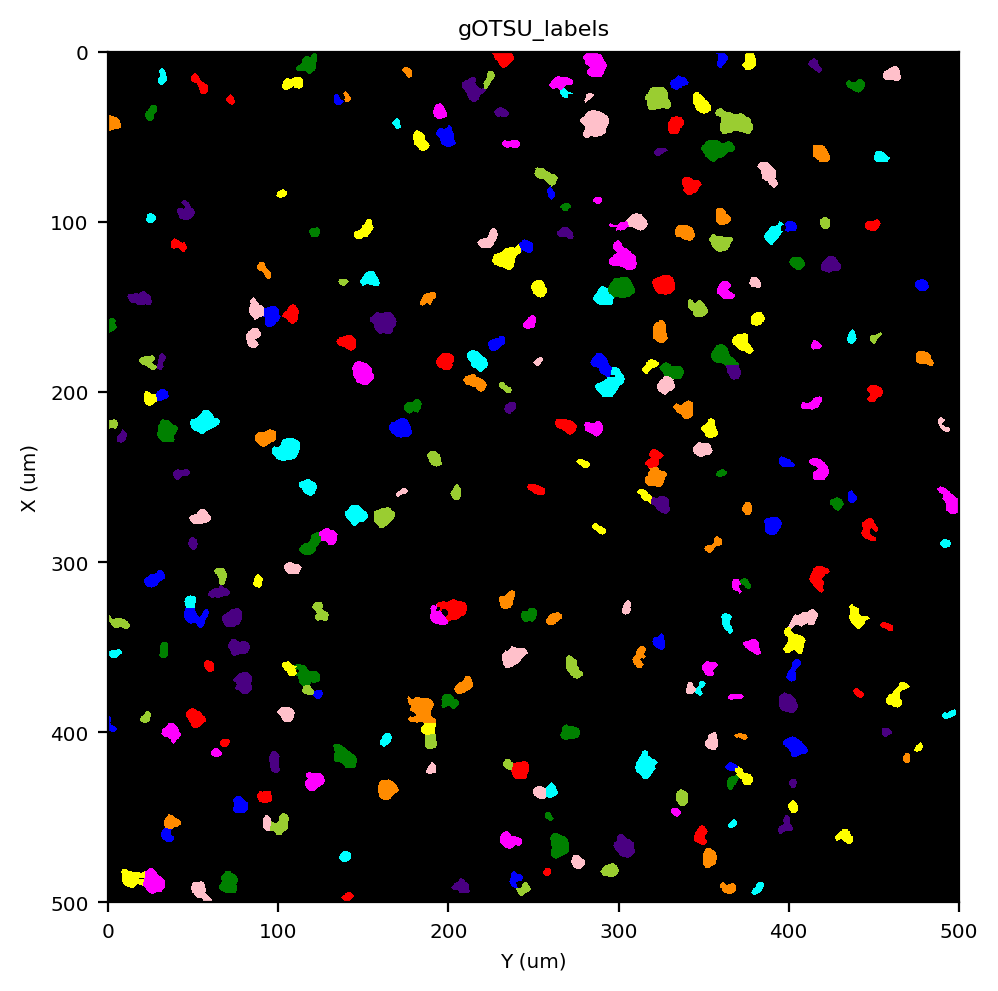

|-----> <select> X layer in AnnData Object
|-----> Scoring pixels with gauss method.
|-----> <insert> X_scores to layers in AnnData Object.
|-----> Applying threshold 0.173828125.
threshold: 0.173828125
|-----> <insert> X_mask to layers in AnnData Object.
|-----> <select> X_mask layer in AnnData Object
|-----> Finding Watershed markers with iterative erosion.


Eroding: 13it [00:00, 344.91it/s]

|-----> <insert> X_markers to layers in AnnData Object.
|-----> <select> X layer in AnnData Object
|-----> <select> X_mask layer in AnnData Object
|-----> <select> X_markers layer in AnnData Object
|-----> Running Watershed.
|-----> <insert> canny_labels to layers in AnnData Object.
|-----> <select> canny_labels layer in AnnData Object
|-----> Cell number before filtering is 373
|-----> <insert> canny_labels to layers in AnnData Object.
|-----> Cell number after filtering is 178
|-----> <select> canny_labels layer in AnnData Object


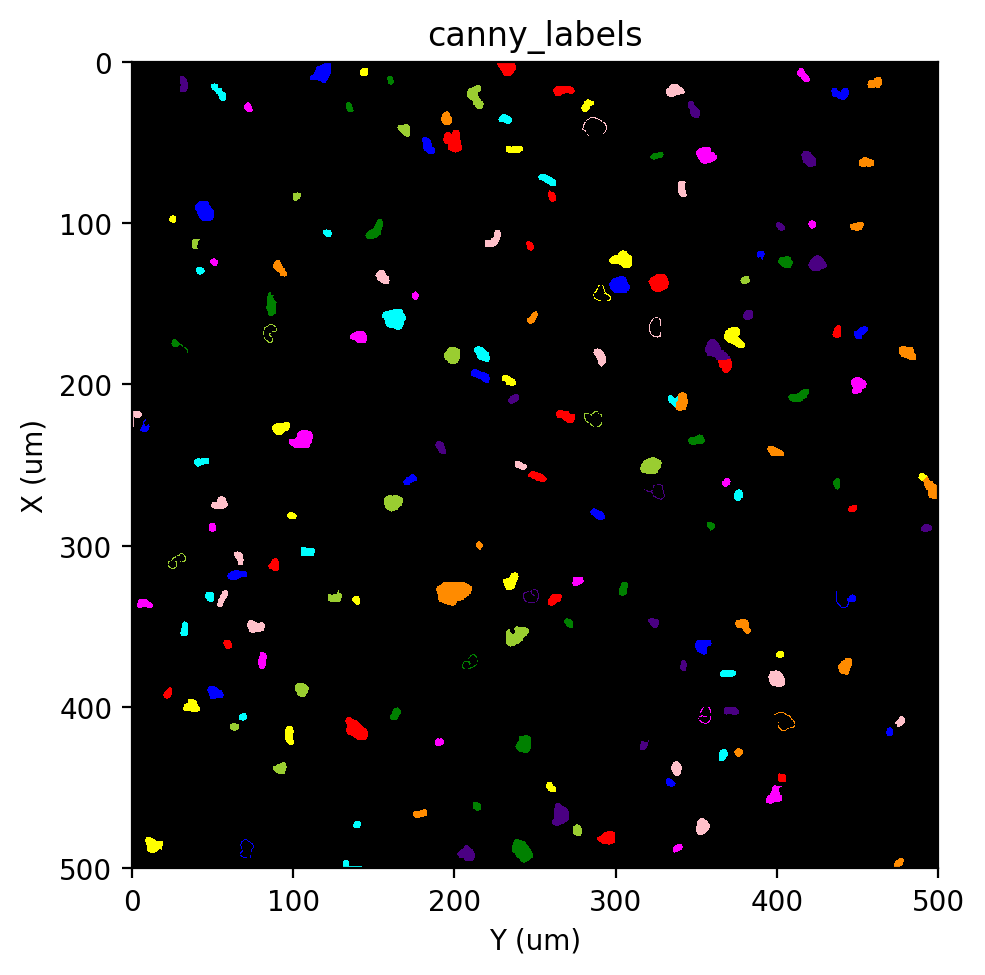

|-----> <select> X layer in AnnData Object
|-----> run Moran’s I.
|-----> <insert> X_mask to layers in AnnData Object.
|-----> <select> X_mask layer in AnnData Object
|-----> Finding Watershed markers with iterative erosion.


Eroding: 9it [00:00, 289.98it/s]

|-----> <insert> X_markers to layers in AnnData Object.
|-----> <select> X layer in AnnData Object
|-----> <select> X_mask layer in AnnData Object
|-----> <select> X_markers layer in AnnData Object
|-----> Running Watershed.
|-----> <insert> moransi_labels to layers in AnnData Object.
|-----> <select> moransi_labels layer in AnnData Object
|-----> Cell number before filtering is 268
|-----> <insert> moransi_labels to layers in AnnData Object.
|-----> Cell number after filtering is 201
|-----> <select> moransi_labels layer in AnnData Object


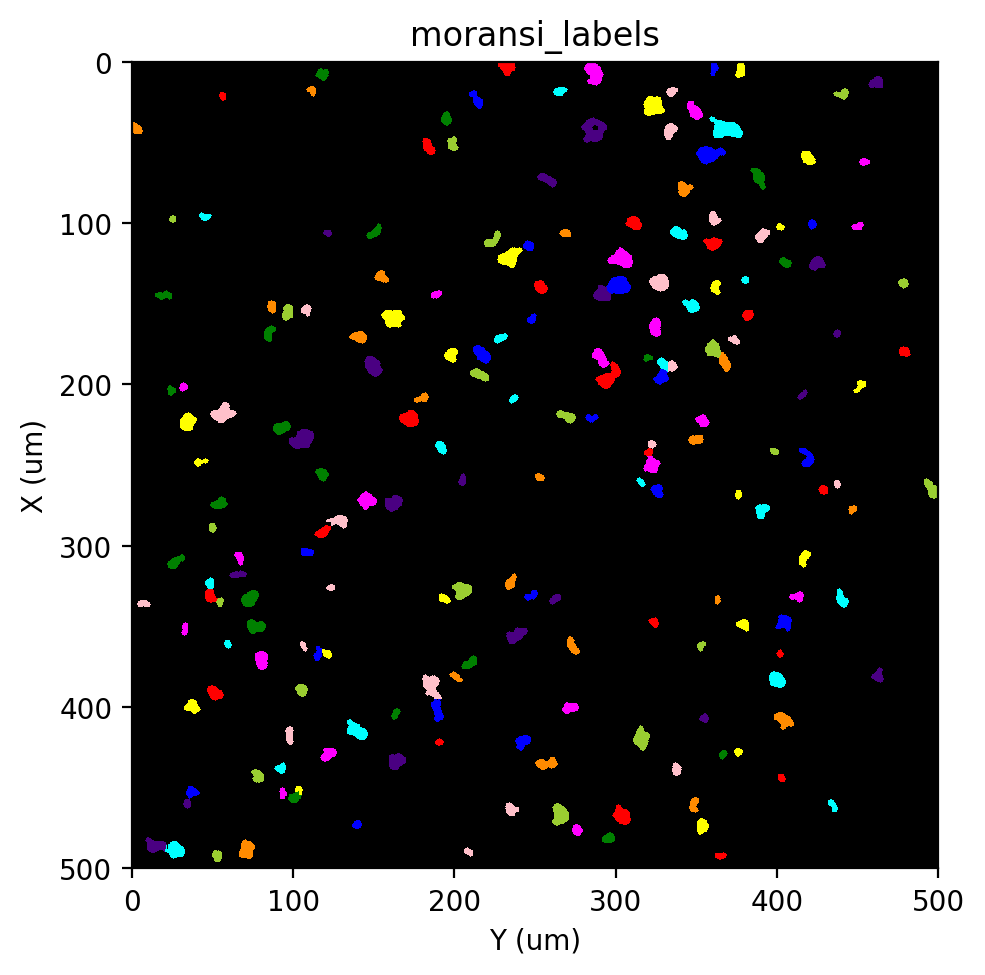

|-----> <select> X layer in AnnData Object
|-----> Scoring pixels with em method.


Running EM:   0%|          | 0/1 [00:00<?, ?it/s]2023-05-26 15:52:27.626290: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/panhailin/miniconda3/envs/spateo/lib/python3.8/site-packages/spaghetti-1.6.5-py3.8.egg/spaghetti/network.py:36: FutureWarning:

The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.



|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


Running EM: 100%|##########| 1/1 [00:34<00:00, 34.23s/it]


|-----> <insert> X_scores to layers in AnnData Object.
|-----> Applying threshold 0.4298076901521193.
threshold: 0.4298076901521193
|-----> <insert> X_mask to layers in AnnData Object.
|-----> <select> X_mask layer in AnnData Object
|-----> Finding Watershed markers with iterative erosion.


Eroding: 13it [00:00, 306.85it/s]

|-----> <insert> X_markers to layers in AnnData Object.
|-----> <select> X layer in AnnData Object
|-----> <select> X_mask layer in AnnData Object
|-----> <select> X_markers layer in AnnData Object
|-----> Running Watershed.
|-----> <insert> em_labels to layers in AnnData Object.
|-----> <select> em_labels layer in AnnData Object
|-----> Cell number before filtering is 383
|-----> <insert> em_labels to layers in AnnData Object.
|-----> Cell number after filtering is 298
|-----> <select> em_labels layer in AnnData Object


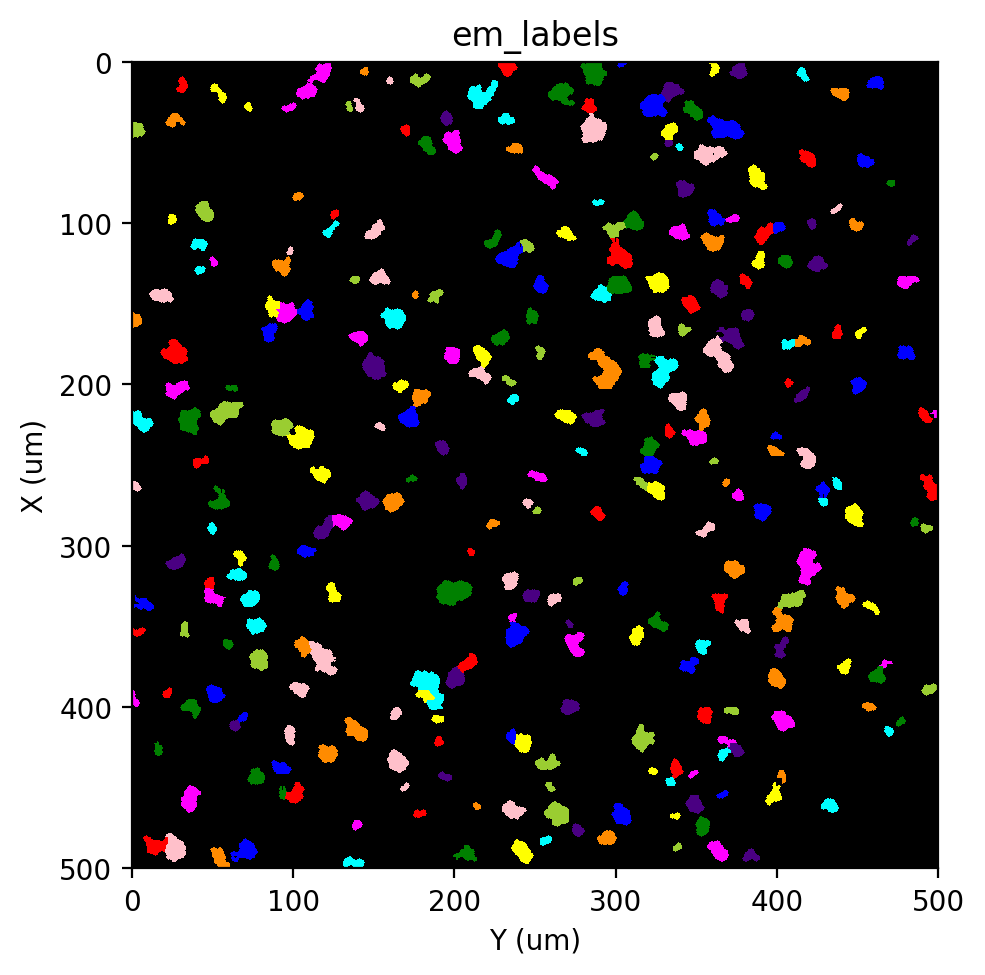

|-----> <select> X layer in AnnData Object
|-----> Scoring pixels with em+bp method.


Running EM:   0%|          | 0/1 [00:00<?, ?it/s]2023-05-26 15:52:59.849351: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/panhailin/miniconda3/envs/spateo/lib/python3.8/site-packages/spaghetti-1.6.5-py3.8.egg/spaghetti/network.py:36: FutureWarning:

The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.



|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


Running EM: 100%|##########| 1/1 [00:31<00:00, 31.32s/it]


|-----> <insert> X_scores to layers in AnnData Object.
|-----> Applying threshold 0.4758922157050327.
threshold: 0.4758922157050327
|-----> <insert> X_mask to layers in AnnData Object.
|-----> <select> X_mask layer in AnnData Object
|-----> Finding Watershed markers with iterative erosion.


Eroding: 14it [00:00, 305.30it/s]

|-----> <insert> X_markers to layers in AnnData Object.
|-----> <select> X layer in AnnData Object
|-----> <select> X_mask layer in AnnData Object
|-----> <select> X_markers layer in AnnData Object
|-----> Running Watershed.
|-----> <insert> embp_labels to layers in AnnData Object.
|-----> <select> embp_labels layer in AnnData Object
|-----> Cell number before filtering is 411
|-----> <insert> embp_labels to layers in AnnData Object.
|-----> Cell number after filtering is 317
|-----> <select> embp_labels layer in AnnData Object


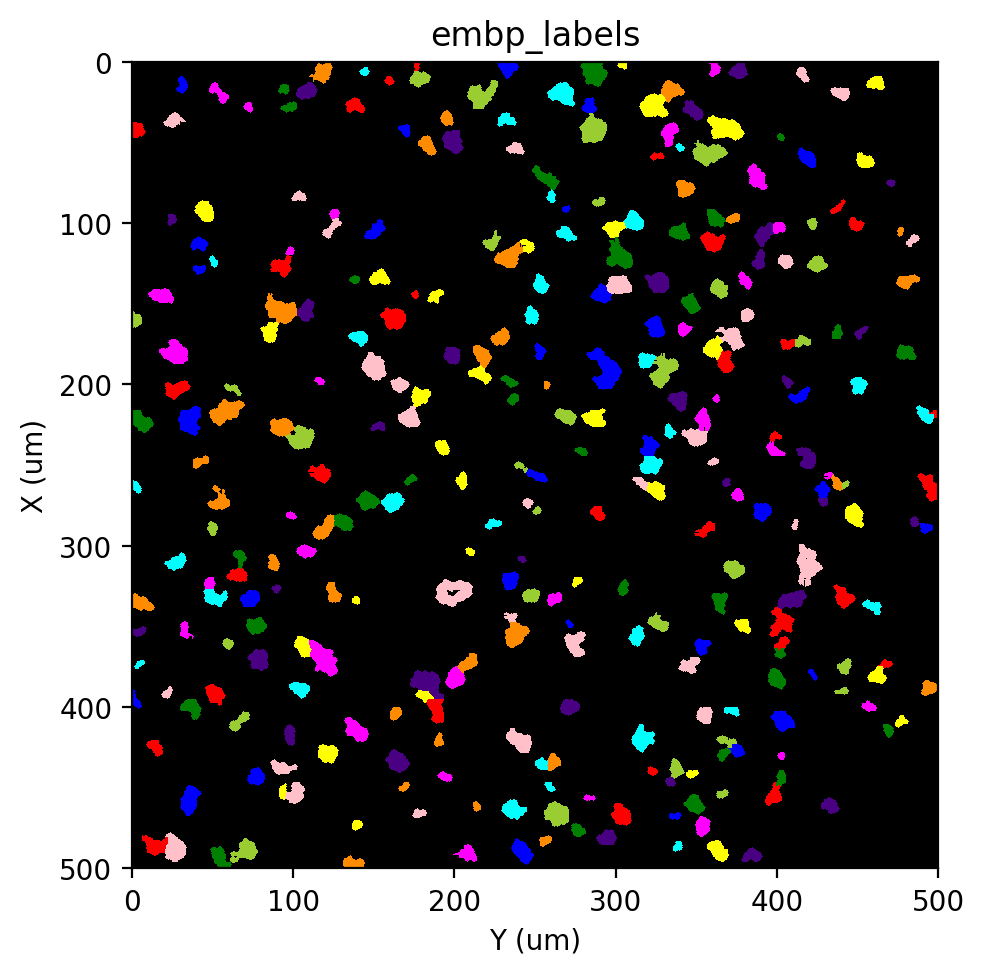

|-----> <select> X layer in AnnData Object
|-----> Scoring pixels with gauss method.
|-----> <insert> X_scores to layers in AnnData Object.
|-----> Applying threshold 0.173828125.
threshold: 0.173828125
|-----> <insert> X_mask to layers in AnnData Object.
|-----> <select> X_scores layer in AnnData Object
|-----> Equalizing image with CLAHE.
|-----> Running StarDist with model 2D_versatile_fluo.
Found model '2D_versatile_fluo' for 'StarDist2D'.


2023-05-26 15:53:30.760755: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/panhailin/miniconda3/envs/spateo/lib/python3.8/site-packages/opencv_python-4.5.5.64-py3.8-linux-x86_64.egg/cv2/../../lib64:
2023-05-26 15:53:30.760781: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-05-26 15:53:30.761055: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operatio

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
1/1 [==============================] - 1s 508ms/step
|-----> Fixing disconnected labels.
|-----> <insert> stardist_labels to layers in AnnData Object.
|-----> <select> stardist_labels layer in AnnData Object
|-----> Cell number before filtering is 1206
|-----> <insert> stardist_labels to layers in AnnData Object.
|-----> Cell number after filtering is 946
|-----> <select> stardist_labels layer in AnnData Object


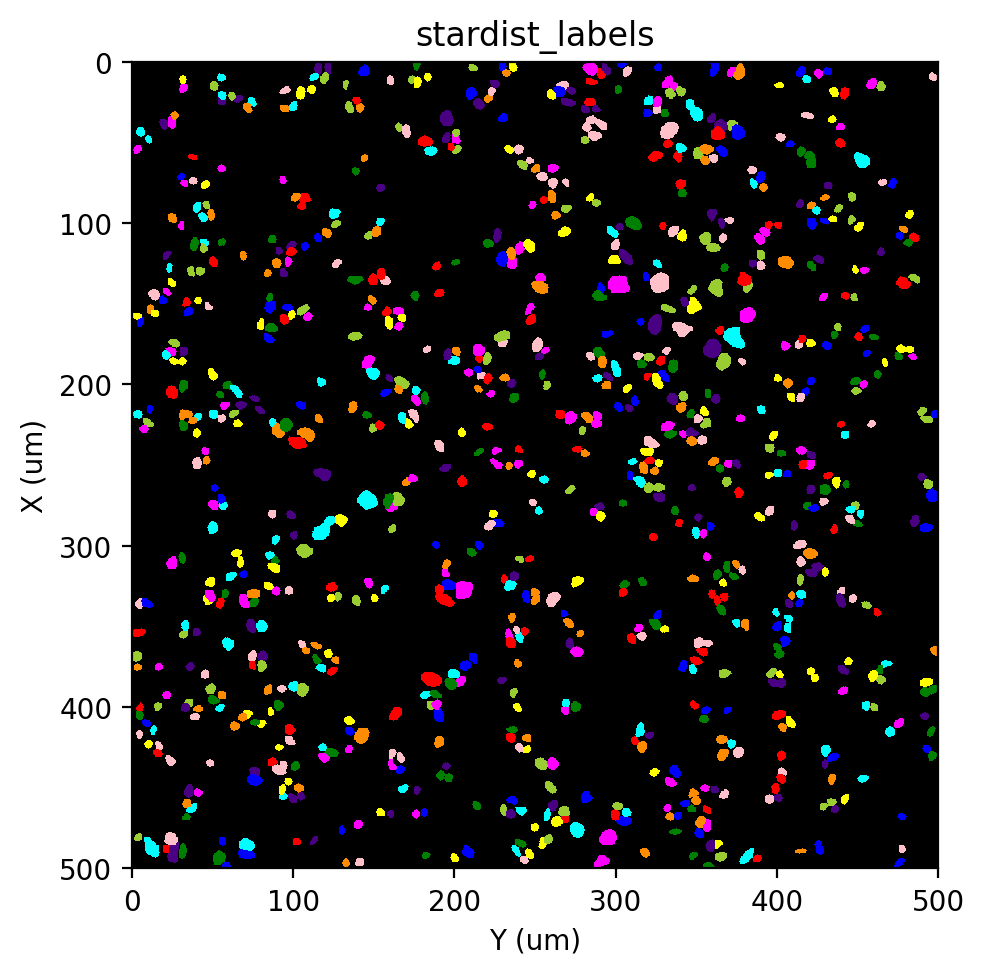

In [3]:
adata = sc_package('sub122.h5ad')

Read the ground truth segmentation and add it into 'ground_truth' layer of adata.

In [33]:
adata.layers['ground_truth'] = cv2.imread("sub122.labels.tif", 2)

Highlight one FOV with 100 * 100 μm.

|-----> <select> unspliced layer in AnnData Object
|-----> <select> ground_truth layer in AnnData Object
|-----> <select> gOTSU_labels layer in AnnData Object
|-----> <select> canny_labels layer in AnnData Object
|-----> <select> moransi_labels layer in AnnData Object
|-----> <select> em_labels layer in AnnData Object
|-----> <select> embp_labels layer in AnnData Object
|-----> <select> stardist_labels layer in AnnData Object


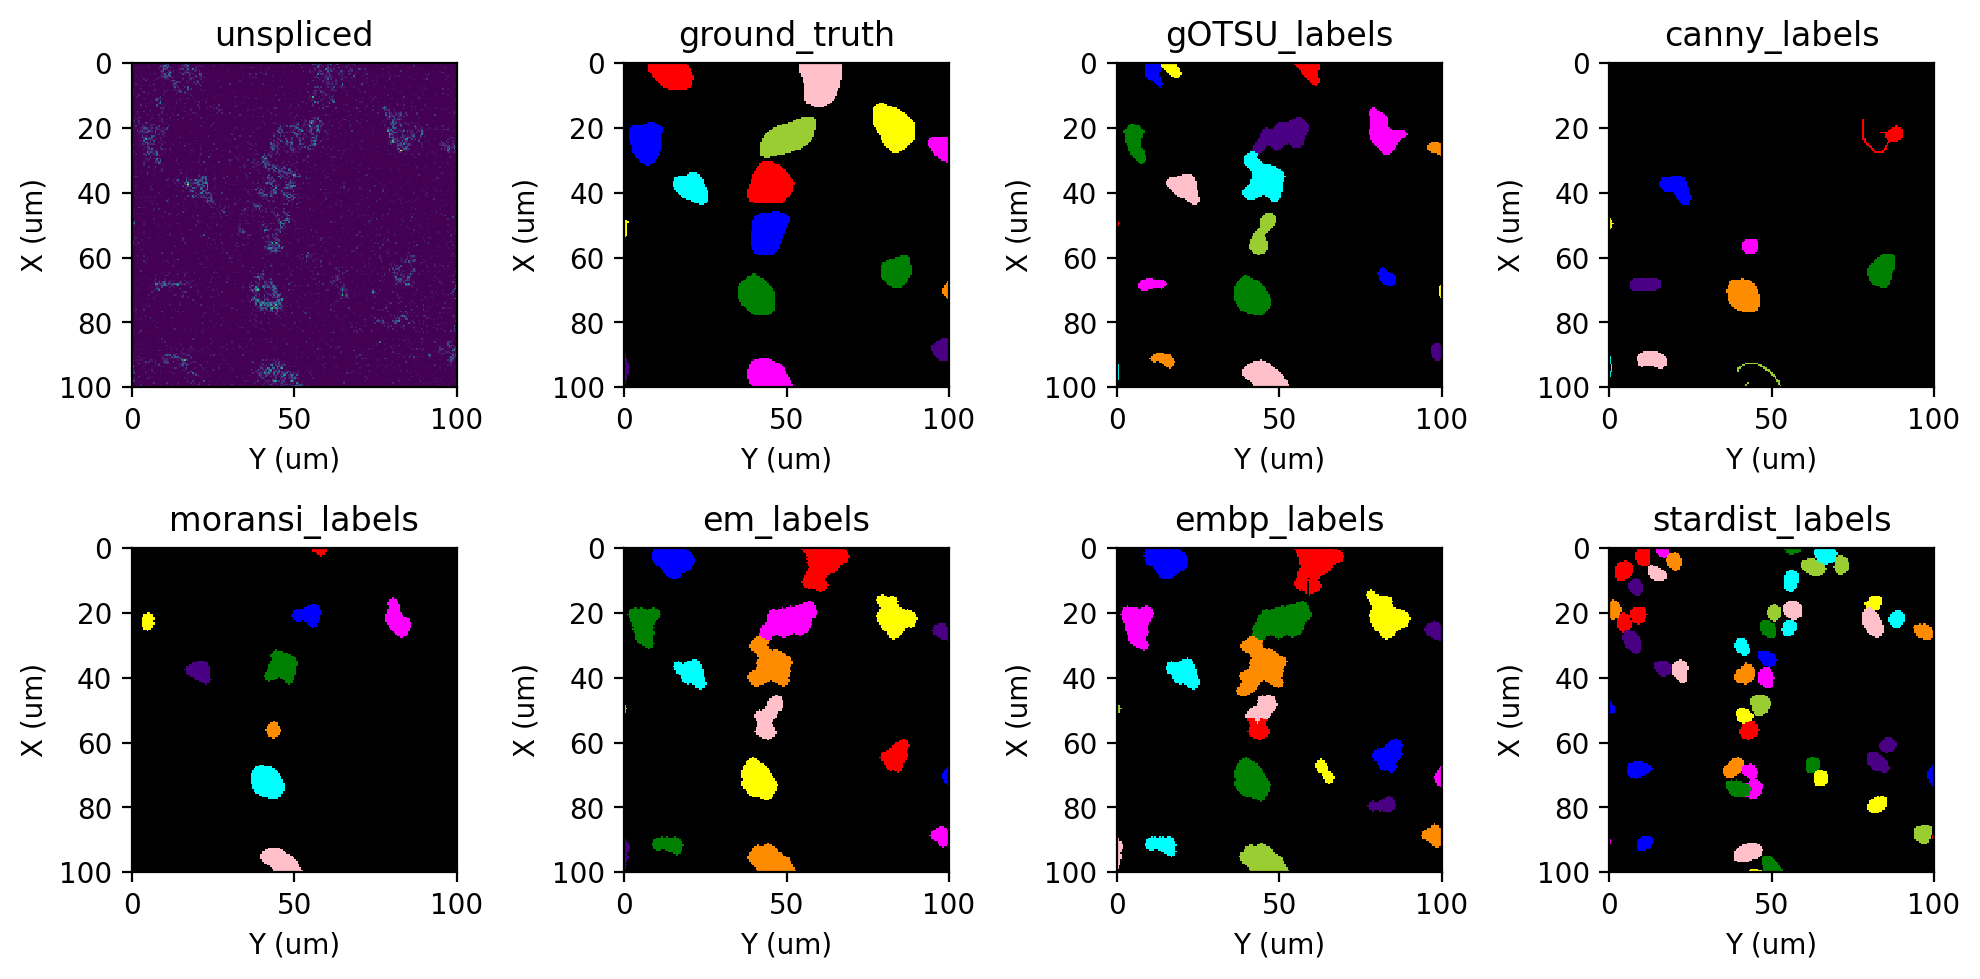

In [47]:
sub_adata = adata[622:622+200,716:716+200]
fig, axes = plt.subplots(2,4, figsize=(10,5))
st.pl.imshow(sub_adata, 'unspliced', save_show_or_return='return', ax=axes[0,0])
st.pl.imshow(sub_adata, 'ground_truth', labels=True, save_show_or_return='return', ax=axes[0,1])
st.pl.imshow(sub_adata, 'gOTSU_labels', labels=True, save_show_or_return='return', ax=axes[0,2])
st.pl.imshow(sub_adata, 'canny_labels', labels=True, save_show_or_return='return', ax=axes[0,3])
st.pl.imshow(sub_adata, 'moransi_labels', labels=True, save_show_or_return='return', ax=axes[1,0])
st.pl.imshow(sub_adata, 'em_labels', labels=True, save_show_or_return='return', ax=axes[1,1])
st.pl.imshow(sub_adata, 'embp_labels', labels=True, save_show_or_return='return', ax=axes[1,2])
st.pl.imshow(sub_adata, 'stardist_labels', labels=True, save_show_or_return='return', ax=axes[1,3])
plt.tight_layout()